<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/ccd_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [39]:
# load data set
data=pd.read_csv("/content/creditcard..csv")

Checking the target classes

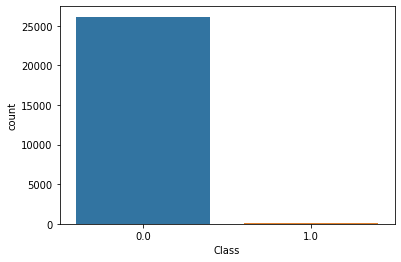

In [81]:
import seaborn as sns
sns.countplot(x='Class', data=data)

Data Pre-processing

In [40]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26232 entries, 0 to 26231
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    26232 non-null  int64  
 1   V1      26232 non-null  float64
 2   V2      26232 non-null  float64
 3   V3      26232 non-null  float64
 4   V4      26232 non-null  float64
 5   V5      26232 non-null  float64
 6   V6      26232 non-null  float64
 7   V7      26232 non-null  float64
 8   V8      26232 non-null  float64
 9   V9      26232 non-null  float64
 10  V10     26232 non-null  float64
 11  V11     26232 non-null  float64
 12  V12     26232 non-null  float64
 13  V13     26232 non-null  float64
 14  V14     26232 non-null  float64
 15  V15     26232 non-null  float64
 16  V16     26232 non-null  float64
 17  V17     26232 non-null  float64
 18  V18     26232 non-null  float64
 19  V19     26232 non-null  float64
 20  V20     26231 non-null  float64
 21  V21     26231 non-null  float64
 22

In [41]:
# no null values
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,26232.000000,...,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000,26231.000000
mean,19593.945639,-0.224527,0.164310,0.723193,0.227503,-0.194923,0.081877,-0.127971,0.027505,0.432040,...,-0.036503,-0.130056,-0.039783,0.010261,0.129724,0.023105,0.013341,0.004292,75.983895,0.003355
std,11699.781757,1.884725,1.548228,1.678807,1.432192,1.433839,1.322473,1.314858,1.336228,1.267866,...,0.815066,0.642071,0.536785,0.590799,0.436228,0.515994,0.396379,0.279071,219.155184,0.057825
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7946.000000,-0.952365,-0.408975,0.277716,-0.685739,-0.780606,-0.660693,-0.594979,-0.163354,-0.392055,...,-0.248626,-0.550543,-0.174232,-0.326497,-0.133218,-0.338709,-0.064872,-0.008715,6.145000,0.000000
50%,23026.000000,-0.267107,0.174774,0.860270,0.204827,-0.225877,-0.178089,-0.068015,0.029970,0.354641,...,-0.097020,-0.104687,-0.049515,0.062293,0.167691,-0.053255,0.007264,0.020026,19.000000,0.000000
75%,30459.250000,1.166597,0.815668,1.488874,1.109052,0.320094,0.469631,0.445369,0.288447,1.190386,...,0.074209,0.278617,0.074995,0.398780,0.411210,0.305553,0.091946,0.076984,68.000000,0.000000
max,33961.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [43]:
# no null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [44]:
data_real = data.replace(np.inf, np.nan)

In [45]:
data_real.isnull().sum().sum()

11

In [46]:
data_df = data_real.dropna(axis=0)

In [47]:
data_df.isnull().sum().sum()

0

In [48]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26226,33958,-1.908302,-0.530449,2.187387,-0.364470,-0.541446,-0.335494,-0.137471,-0.032961,-0.937541,...,-0.312274,0.030945,-0.789737,0.555849,0.343029,-0.345219,0.098363,-0.123947,158.00,0.0
26227,33959,-0.800879,0.351734,0.979350,0.835465,0.375351,-0.401530,0.714926,0.085832,-0.685863,...,0.227766,0.455261,0.118088,-0.019529,-0.140324,-0.315224,0.357587,0.226904,109.95,0.0
26228,33959,-2.355841,3.989334,-3.128446,0.719454,0.910165,-1.706192,1.350955,-0.687888,2.717420,...,-0.793340,-0.301089,0.076345,-0.502006,0.090564,-0.559409,-0.419451,-1.247590,1.51,0.0
26229,33960,-0.896418,1.191951,1.582384,-0.284955,0.130085,-0.208226,0.750122,-0.010985,-0.178652,...,-0.246863,-0.330104,0.007405,0.204154,-0.237058,0.051072,0.327513,0.019864,12.96,0.0


In [49]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
data_df['scaled_amount'] = rob_scaler.fit_transform(
    data_df['Amount'].values.reshape(-1, 1))
data_df['scaled_time'] = rob_scaler.fit_transform(
  data_df['Time'].values.reshape(-1, 1))
    
data_df.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,2.111713,-1.022788
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.263681,-1.022788
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,5.814566,-1.022743
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,1.689435,-1.022743
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.824347,-1.022699


In [51]:
x = data_df.drop(['Class'], axis = 1)

In [52]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [55]:
y = data_df['Class']

In [67]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26226    0.0
26227    0.0
26228    0.0
26229    0.0
26230    0.0
Name: Class, Length: 26231, dtype: float64

Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trans = le.fit_transform(y)
le_fid = LabelEncoder()

Applying SMOTE with Over Sampling

In [88]:
#Apply SMOTE to create synthetic observations from minority class
#Over sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto',random_state=None)
x_sampled,y_sampled = sm.fit_resample(x,y.values.ravel())

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(data[data.Class==0])
Source_data_fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

#Percentage of fraudlent records in sampled data
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in original dataset:0.33548091952270215%
Percentage of fraud counts in the new data:50.0%


Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(x_sampled ,y_sampled,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))

X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)

Number transactions train dataset:  18361
Number transactions test dataset:  7870
Total number of transactions:  26231

Number transactions train dataset:  36600
Number transactions test dataset:  15686
Total number of transactions:  52286


Feature Importance

In [109]:
# feature importance
mutual_info = mutual_info_classif(X_train_sampled_df, y_train_sampled_df)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_sampled.columns
mutual_info.sort_values(ascending = False)

V4               0.582391
V14              0.562353
V12              0.538255
V10              0.499686
V3               0.494928
V17              0.485649
V11              0.483401
V2               0.448813
V16              0.439894
V7               0.404161
V6               0.396457
scaled_amount    0.394079
V27              0.393983
V21              0.383716
V28              0.362021
V9               0.355774
V5               0.342713
V1               0.324963
V18              0.308863
V26              0.283712
V20              0.281474
scaled_time      0.265890
V23              0.237204
V8               0.225836
V25              0.217466
V24              0.200851
V19              0.164724
V13              0.119186
V22              0.111877
V15              0.111294
dtype: float64

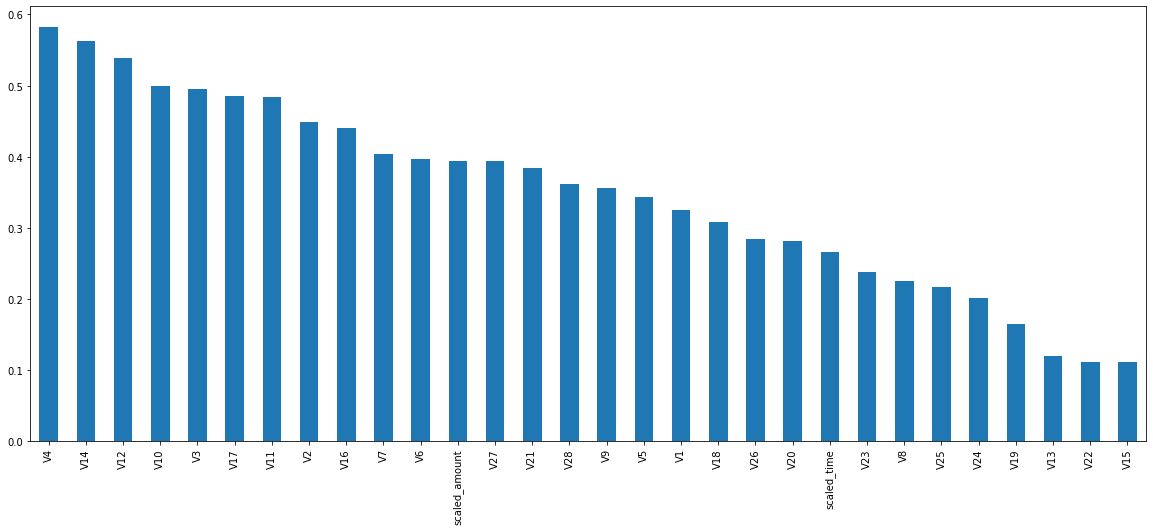

In [110]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

Feature selection

In [113]:
# select top 15 features
selector = SelectKBest(mutual_info_classif, k=15)
selector.fit(X_train_sampled, y_train_sampled)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train_sampled.iloc[:,cols]
new_test = X_test_sampled.iloc[:,cols]

In [114]:
new_train

,V2,V3,V4,V6,V7,V10,V11,V12,V14,V16,V17,V21,V27,V28,scaled_amount
289,0.599810,0.216683,-0.513093,3.882795,0.295545,0.191990,-0.925471,-0.369425,-0.493814,0.684362,-1.048205,-0.147920,0.163595,-0.004997,-0.141137
23015,-1.185021,1.507550,0.873108,1.044218,-1.362365,0.650718,0.433714,0.646134,-0.485407,-1.664855,0.300031,-0.235116,0.106913,0.047419,1.552340
52231,6.126888,-12.497821,9.205085,-2.751157,-9.545400,-11.719710,11.416565,-16.838818,-17.316601,-11.124038,-15.724588,1.880910,1.947542,0.765519,-0.291003
18282,-1.220481,0.576681,-1.597649,0.062760,-1.273469,1.519826,0.649692,0.110006,-0.564606,0.304352,-0.233172,-0.201061,0.049309,0.023850,0.641500
27781,4.158215,-7.331950,7.280650,-2.861762,-1.277996,-4.224974,4.768308,-7.617605,-9.420431,-1.156375,1.542126,0.304718,0.615885,0.183798,-0.291003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,-2.050144,-0.466434,-0.042731,-0.904008,0.379405,0.415683,-0.850408,-0.383996,0.269379,-1.700238,0.368616,-0.160474,-0.165922,0.081869,7.723547
45891,2.075971,-1.605034,3.803395,-1.376222,-2.414271,-2.269923,3.219841,-3.375247,-4.155791,-1.623777,-3.148430,0.705970,-0.282901,-0.212171,-0.283141
42613,1.023311,-0.368500,2.873804,-0.226880,0.166830,-0.474730,0.879308,-1.791032,-1.224876,1.124984,1.736969,-0.357765,0.004808,0.055768,-0.246107
43567,12.649548,-23.548651,6.173784,-4.421801,-16.226602,-8.720915,5.495040,-7.742502,-8.080675,-6.702478,-13.160791,1.758383,1.551178,0.461525,1.309353


Model Training

1 Decision-tree

In [120]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train_sampled_df)
test_pred = dt.predict(new_test)

In [121]:
Y_predicted_dt = dt.predict(new_test)
Y_pred_train_dt = dt.predict(new_train)

In [124]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train_sampled_df, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[7809    0]
 [   6 7871]]

 Macro Averaged Accuracy :0.9996174933061328

 Macro Averaged Precision :0.9996191443442934

 Macro Averaged Recall :0.999616122840691

 Macro Averaged F1-Score :0.9996174873302127

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:0.9996174933061328


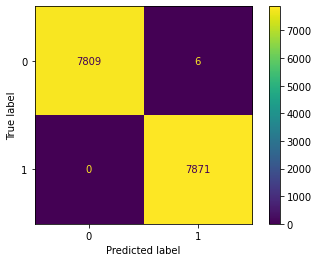

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test_sampled_df,Y_predicted_dt)
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

[Text(0.39473684210526316, 0.96875, 'X[8] <= -1.656\nentropy = 1.0\nsamples = 36600\nvalue = [18328, 18272]'),
 Text(0.21052631578947367, 0.90625, 'X[2] <= 1.744\nentropy = 0.16\nsamples = 17382\nvalue = [406, 16976]'),
 Text(0.10526315789473684, 0.84375, 'X[9] <= -4.044\nentropy = 0.179\nsamples = 334\nvalue = [325, 9]'),
 Text(0.05263157894736842, 0.78125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.15789473684210525, 0.78125, 'entropy = 0.0\nsamples = 325\nvalue = [325, 0]'),
 Text(0.3157894736842105, 0.84375, 'X[7] <= -0.484\nentropy = 0.044\nsamples = 17048\nvalue = [81, 16967]'),
 Text(0.2631578947368421, 0.78125, 'X[2] <= 2.068\nentropy = 0.031\nsamples = 17021\nvalue = [54, 16967]'),
 Text(0.15789473684210525, 0.71875, 'X[9] <= -2.362\nentropy = 0.526\nsamples = 202\nvalue = [24, 178]'),
 Text(0.10526315789473684, 0.65625, 'entropy = 0.0\nsamples = 178\nvalue = [0, 178]'),
 Text(0.21052631578947367, 0.65625, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.36

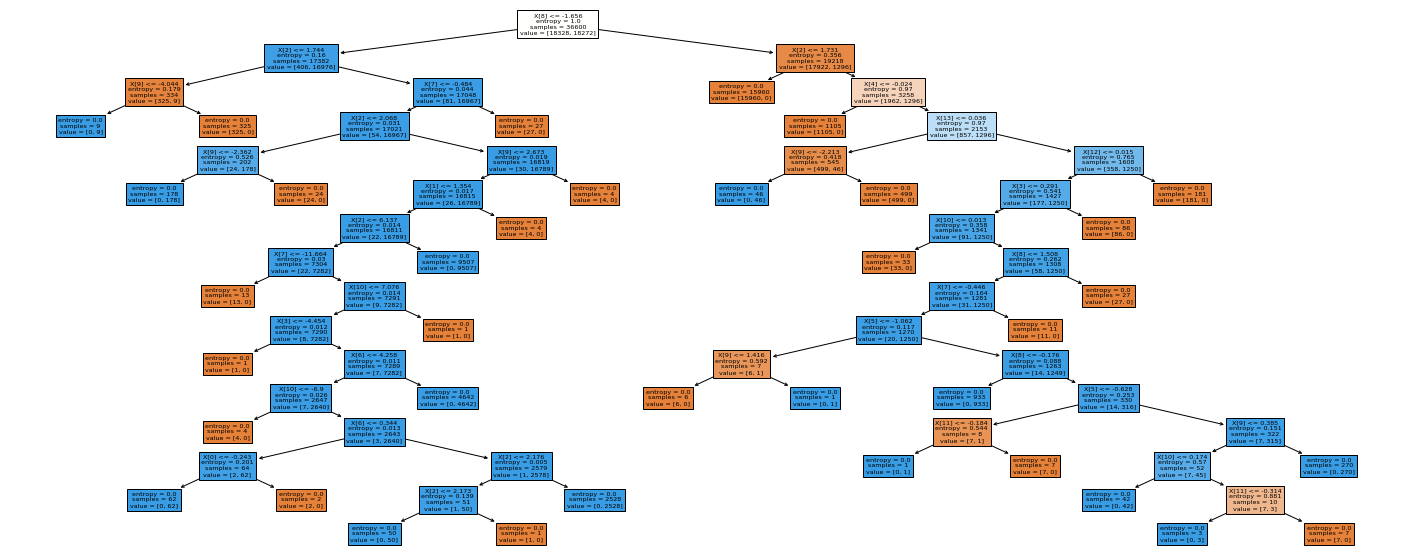

In [133]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

2.Random forest

In [134]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(new_train,y_train_sampled_df)
Y_predicted_rf = rf.predict(new_test)
Y_pred_train_rf = rf.predict(new_train)

In [136]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[7812    0]
 [   3 7871]]

 Macro Averaged Accuracy :0.9998087466530664

 Macro Averaged Precision :0.9998094996189992

 Macro Averaged Recall :0.9998080614203455

 Macro Averaged F1-Score :0.999808743947272

 Micro Averaged F1-Score:0.9998087466530664


XG Boost

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(new_train, y_train_sampled_df)
Y_predicted_gb = gb.predict(new_test)
Y_pred_train_gb = gb.predict(new_train)

In [140]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[7803    0]
 [  12 7871]]

 Macro Averaged Accuracy :0.9992349866122657

 Macro Averaged Precision :0.9992388684510973

 Macro Averaged Recall :0.999232245681382

 Macro Averaged F1-Score :0.9992349722351885

 Micro Averaged F1-Score:0.9992349866122657


In [143]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(y_train_sampled_df, dt.predict_proba(new_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test_sampled_df, dt.predict_proba(new_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 99.96161228406909
